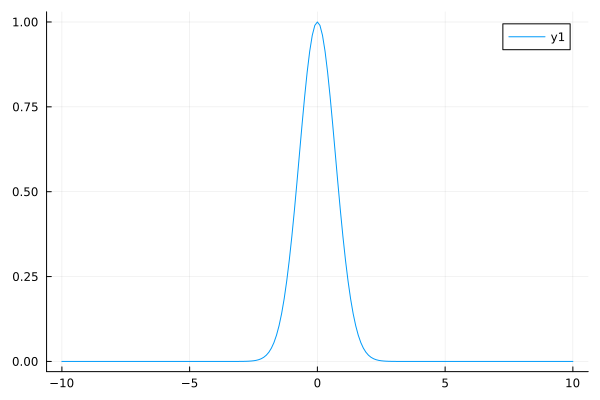

In [1]:
using Printf
using Statistics
using Plots
using SparseArrays: spdiagm
using LinearAlgebra


dx=0.1
# dt=10
L=10
# T=20000
# h_bar=1e-3

x=collect(-L:dx:L)
# t=collect(0:dt:T)
n=length(x)
# m= length(t)

# Defining the function
function f(x)
    return exp(-x^2)
end

plot(x,f.(x)) #Ploting the function


In [2]:
#  Taking the absolute value of it.
function prob_dens(x)
    return(f(x)^2)
end

prob_dens (generic function with 1 method)

In [3]:
# Integrating using simpson method
function simpson(func,a,b,N)
    h=(b-a)/(N-1)
    sum= (func(a)+func(b))

    for i=1:2:N-1
        sum += 4*func(a+ i*h)
    end
    
    for i=2:2:N-2
        sum += 2*func(a+ i*h)
    end
    return h*(sum)/3
end



simpson (generic function with 1 method)

In [4]:
N=simpson(prob_dens,-10,10,1001)
println(N)
#  The value is accuarate till 13th place


1.2533141373155001


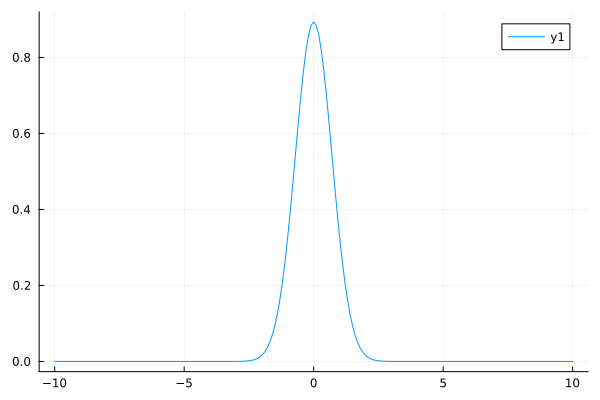

In [5]:
function norm_psi(x)
    return f(x)/(N^(.5))
end
plot(x,norm_psi.(x))
# size(norm_psi.(x))

In [6]:
for r in 1:4
    A = [2*i^(2*j)//factorial(2*j) for i=1:r, j=1:r]
    B = Rational.(hcat(-2*ones(r), Matrix(1I, r, r)))
    C = inv(A)*B
    println(C[1,:])
end

Rational{Int64}[-2//1, 1//1]
Rational{Int64}[-5//2, 4//3, -1//12]
Rational{Int64}[-49//18, 3//2, -3//20, 1//90]
Rational{Int64}[-205//72, 8//5, -1//5, 8//315, -1//560]
